In [1]:
import pandas as pd

# Create data for the car price dataset
data = {
    'Year': [2015, 2016, 2018, 2019, 2020, 2021, 2014, 2013, 2022, 2017,
             2016, 2018, 2015, 2019, 2020, 2018, 2017, 2021, 2020, 2015,
             2014, 2016, 2019, 2013, 2022, 2021, 2015, 2018, 2017, 2020,
             2019, 2016, 2015, 2018, 2022, 2021, 2014, 2013, 2019, 2020,
             2018, 2017, 2021, 2015, 2016, 2022, 2014, 2013, 2019, 2020],

    'Mileage': [30000, 25000, 15000, 20000, 10000, 5000, 45000, 60000, 5000, 20000,
                25000, 15000, 30000, 20000, 10000, 4000, 18000, 3000, 5000, 25000,
                35000, 40000, 20000, 50000, 3000, 4000, 25000, 15000, 10000, 5000,
                20000, 60000, 30000, 5000, 25000, 15000, 40000, 30000, 20000, 10000,
                18000, 25000, 5000, 10000, 15000, 40000, 30000, 20000, 5000, 10000],

    'Brand': [1, 2, 1, 3, 2, 1, 2, 3, 1, 2,
              3, 1, 2, 1, 2, 3, 1, 2, 2, 1,
              3, 2, 1, 3, 2, 1, 2, 3, 1, 2,
              2, 3, 1, 2, 1, 3, 2, 1, 3, 2,
              2, 1, 2, 3, 1, 2, 3, 1, 2, 3],

    'Engine Size': [2.0, 1.8, 2.5, 2.0, 1.6, 3.0, 2.2, 1.5, 2.4, 1.9,
                    1.8, 2.0, 2.2, 2.5, 1.6, 1.4, 3.0, 2.5, 1.9, 2.0,
                    2.2, 1.8, 2.4, 1.6, 2.1, 1.5, 2.0, 2.3, 1.7, 1.8,
                    2.0, 1.9, 2.1, 2.5, 2.2, 1.8, 1.6, 2.4, 2.1, 1.9,
                    2.5, 1.8, 1.7, 2.2, 2.3, 1.6, 1.4, 1.8, 2.0, 2.2],

    'Horsepower': [150, 120, 200, 180, 160, 250, 140, 130, 230, 190,
                   160, 170, 180, 200, 210, 220, 250, 240, 200, 150,
                   130, 140, 180, 160, 210, 220, 180, 150, 170, 190,
                   200, 250, 160, 180, 190, 140, 150, 200, 170, 160,
                   240, 220, 250, 200, 180, 170, 160, 150, 220, 230],

    'Price': [20, 18, 25, 22, 30, 35, 15, 12, 40, 27,
              28, 26, 21, 23, 34, 31, 29, 36, 24, 19,
              17, 18, 25, 15, 41, 37, 22, 20, 34, 28,
              32, 26, 25, 23, 40, 35, 30, 28, 19, 20,
              22, 34, 36, 30, 25, 29, 15, 18, 24, 33]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save DataFrame to a CSV file
df.to_csv('car_price_prediction.csv', index=False)

print("Dataset created and saved as 'car_price_prediction.csv'")


Dataset created and saved as 'car_price_prediction.csv'


   Year  Mileage  Brand  Engine Size  Horsepower  Price
0  2015    30000      1          2.0         150     20
1  2016    25000      2          1.8         120     18
2  2018    15000      1          2.5         200     25
3  2019    20000      3          2.0         180     22
4  2020    10000      2          1.6         160     30
Mean Squared Error: 23.15447418529828
R-squared: 0.38435325218563465

Actual vs Predicted:
   Actual Prices  Predicted Prices
0             23         29.690774
1             20         28.960837
2             32         29.727118
3             29         32.223674
4             36         34.002102
5             24         31.977889
6             22         22.681215
7             37         39.095511
8             25         22.670464
9             19         22.606017


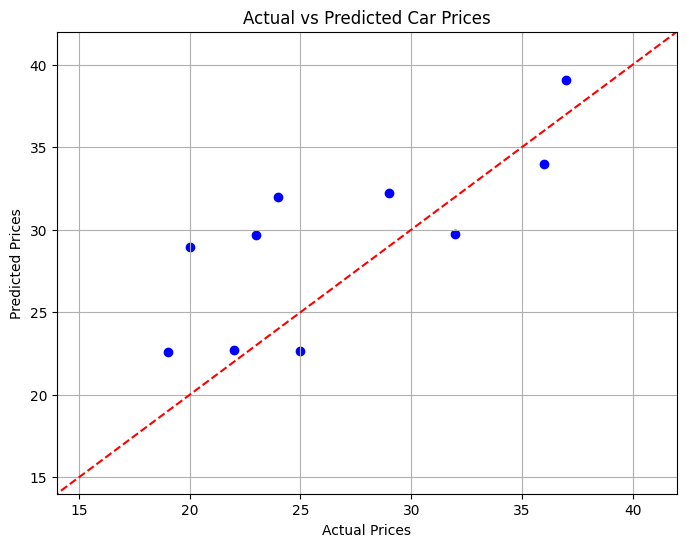

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('car_price_prediction.csv')

# Display the first few rows of the dataset
print(df.head())

# Define features (X) and target variable (y)
X = df[['Year', 'Mileage', 'Brand', 'Engine Size', 'Horsepower']]
y = df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)  # Adjust the alpha parameter for regularization strength

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print actual and predicted values in two columns
results = pd.DataFrame({'Actual Prices': y_test.values, 'Predicted Prices': y_pred})
print("\nActual vs Predicted:")
print(results)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')

# Draw the ideal line
plt.plot([0, 50], [0, 50], color='red', linestyle='--')

# Set limits to minimize empty space
plt.xlim(y_test.min() - 5, y_test.max() + 5)
plt.ylim(y_test.min() - 5, y_test.max() + 5)

plt.grid()
plt.show()
